<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/06_2_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K평균
1. 무작위로 k개의 클러스터 중심을 정함

2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정

3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경

4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아감

In [9]:
import numpy as np
import matplotlib.pyplot as plt
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2026-02-09 18:10:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-09 18:10:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-09 18:10:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
fruits = np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1, 100*100)

from sklearn.cluster import KMeans

#n_clusters -> 클러스터 개수
km=KMeans(n_clusters=3, random_state=42)
#학습(10000차원 상에서 학습)
km.fit(fruits_2d)
# 각 데이터에 붙인 번호 확인
print(km.labels_)
#각 번호 갯수
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


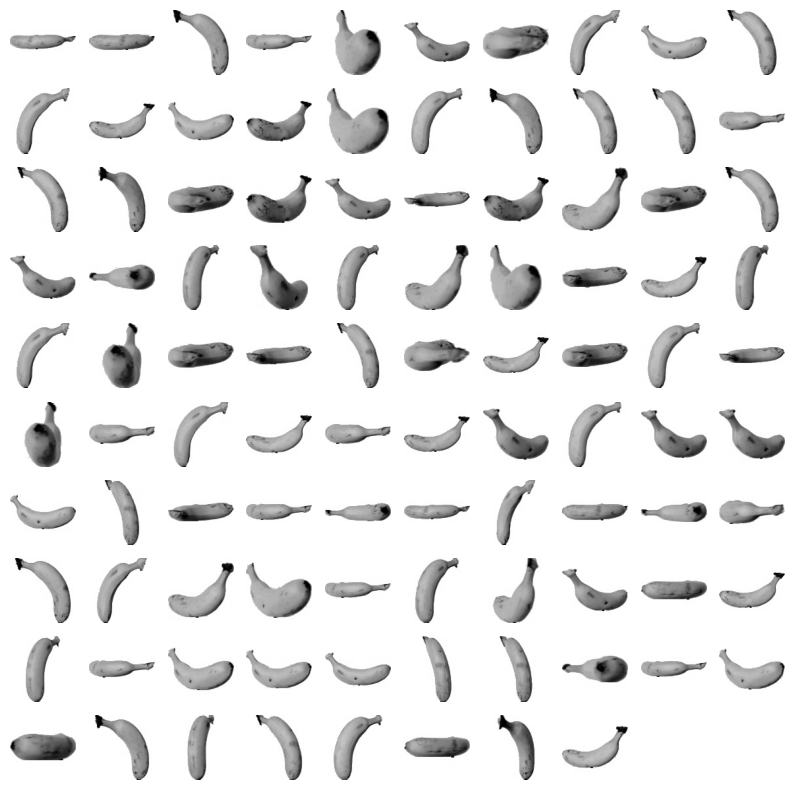

In [4]:
#각 과일 출력 위한 함수
def draw_fruits(arr, ratio=1):
  n=len(arr)
  rows= int(np.ceil(n/10))
  cols= n if rows<2 else 10
  #squeeze=False -> 차원 유지 [1,3]이면 1차원으로 변환될 수도 있음
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i][j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i][j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==1])

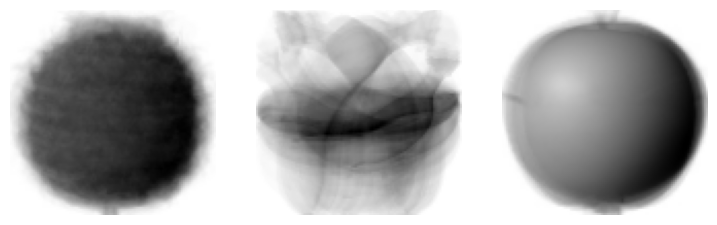

In [5]:
#cluster_center_->클러스터 중심을 이미지로 출력(10000개 각 픽셀의 중심)
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)


[[3400.24197319 8837.37750892 5279.33763699]]
[0]


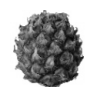

4


In [6]:
#각 클러스터 중심까지 거리 출력
# [100]으로하면 1차원으로 해석 가능...사이킷런이 원하지 않는 형태, 그래서 [100:101]으로
print(km.transform(fruits_2d[100:101]))
#클러스터 중심 예측
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])

#클러스터 중심 찾기위한 반복 횟수
print(km.n_iter_)